<a href="https://colab.research.google.com/github/NdumbiData/Fraudulent-Transaction-Detection-for-Digital-Money-Transfer/blob/main/EDA_%26_Feature_Engineering_ipynb).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Data analysis
import pandas as pd
import numpy as np

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns

In [593]:
# Load the Cleaned data set

df= pd.read_csv('/content/drive/MyDrive/Data Science Internship/cleaned_data_nova_pay_Combined.csv')

df.head(1)

,transaction_id,customer_id,timestamp,home_country,source_currency,dest_currency,channel,amount_src,amount_usd,fee,...,ip_risk_score,kyc_tier,account_age_days,device_trust_score,chargeback_history_count,risk_score_internal,txn_velocity_1h,txn_velocity_24h,corridor_risk,is_fraud
0,fee8542d-8ee6-4b0d-9671-c294dd08ed26,402cccc9-28de-45b3-9af7-cc5302aa1f93,2022-10-03 18:40:59.468549+00:00,US,USD,CAD,ATM,278.19,278.19,4.25,...,0.123,standard,263,0.522,0,0.223,0,0,0.0,0


In [594]:
df.columns.to_list()

['transaction_id',
 'customer_id',
 'timestamp',
 'home_country',
 'source_currency',
 'dest_currency',
 'channel',
 'amount_src',
 'amount_usd',
 'fee',
 'exchange_rate_src_to_dest',
 'device_id',
 'new_device',
 'ip_address',
 'ip_country',
 'location_mismatch',
 'ip_risk_score',
 'kyc_tier',
 'account_age_days',
 'device_trust_score',
 'chargeback_history_count',
 'risk_score_internal',
 'txn_velocity_1h',
 'txn_velocity_24h',
 'corridor_risk',
 'is_fraud']

In [595]:
#start by getting the coorelation of the "is fraud" column to other features.

df.corr(numeric_only=True)['is_fraud'].sort_values(ascending=False)

,is_fraud
is_fraud,1.000000
txn_velocity_24h,0.751737
txn_velocity_1h,0.688367
risk_score_internal,0.602002
chargeback_history_count,0.581129
ip_risk_score,0.520355
location_mismatch,0.418109
new_device,0.378426
corridor_risk,0.193732
exchange_rate_src_to_dest,0.152592


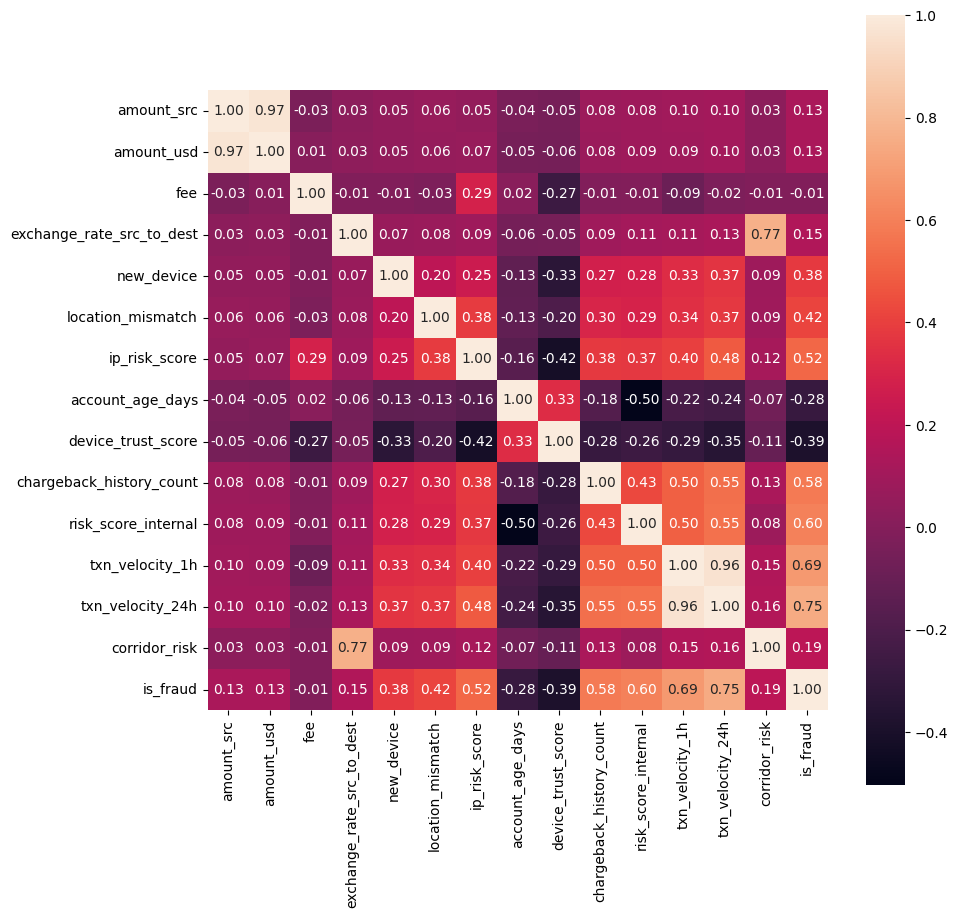

In [596]:
#df.corr Heatmap to figure relationships to fraud

corr = df.corr(numeric_only=True)

plt.figure(figsize = (10,10))

hm = sns.heatmap(corr, cbar=True , annot=True, square =True, fmt='.2f', annot_kws={"size":10});

Univariate Analysis

In [597]:
# combine categorical features to a dataframe for analysing

cat_cols= df.select_dtypes(include={'object','category'}).columns

print(cat_cols)

Index(['transaction_id', 'customer_id', 'timestamp', 'home_country',
       'source_currency', 'dest_currency', 'channel', 'device_id',
       'ip_address', 'ip_country', 'kyc_tier'],
      dtype='object')


In [598]:
num_cols= df.select_dtypes(include=['int64','float64','bool']).columns
print(num_cols)

Index(['amount_src', 'amount_usd', 'fee', 'exchange_rate_src_to_dest',
       'new_device', 'location_mismatch', 'ip_risk_score', 'account_age_days',
       'device_trust_score', 'chargeback_history_count', 'risk_score_internal',
       'txn_velocity_1h', 'txn_velocity_24h', 'corridor_risk', 'is_fraud'],
      dtype='object')


In [599]:
df.columns.value_counts()

,count
transaction_id,1
customer_id,1
timestamp,1
home_country,1
source_currency,1
dest_currency,1
channel,1
amount_src,1
amount_usd,1
fee,1


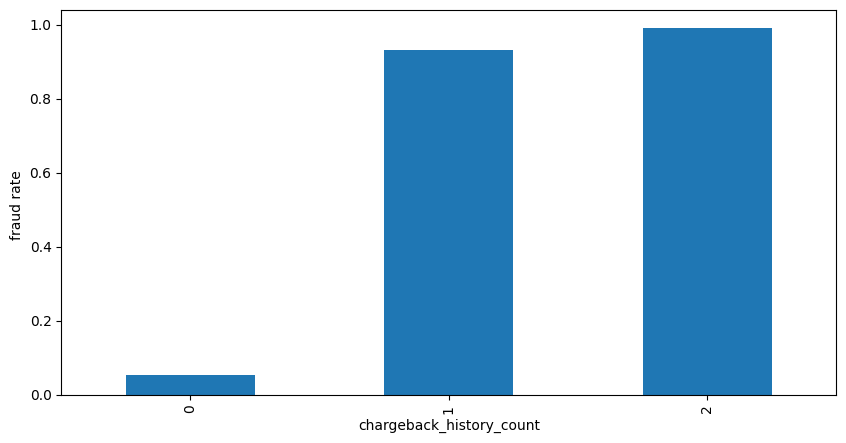

In [600]:
# Visualisation on location mismatch and fraud

df.groupby('chargeback_history_count')['is_fraud'].mean().plot.bar(figsize=(10,5))
plt.xlabel("chargeback_history_count")
plt.ylabel("fraud rate ")
plt.show()

In [601]:
df['channel'].unique()

array(['ATM', 'web', 'mobile', 'WEB', ' web  ', 'MOBILE', 'mobille',
       'unknown', ' mobile  ', 'weeb', 'ATm', ' ATM  '], dtype=object)

In [602]:
from pandas.core.arrays.boolean import coerce_to_array
# Need to combine the variables to one , Only four words allowed (atm),(mobile),(web) and corce null values)

if 'channel' in df.columns:
    df['channel'] = df['channel'].str.replace('ATm', 'atm')
    df['channel'] = df['channel'].str.replace('MOBILE', 'mobile')
    df['channel'] = df['channel'].str.replace('weeb', 'web')
    df['channel'] = df['channel'].str.replace('WEB', 'web')
    df['channel'] = df['channel'].str.replace('mobille', 'mobile')
    df['channel'] = df['channel'].str.replace(' web', 'web')
    df['channel'] = df['channel'].str.replace('ATM', 'atm')
    df['channel'] = df['channel'].str.replace('web  ', 'web')
    df['channel'] = df['channel'].str.replace(' atm  ', 'atm')
    df['channel'] = df['channel'].str.replace(' mobile  ', 'mobile')
else:
  # coerce to null values
  pass

In [603]:
df['channel'].unique()

array(['atm', 'web', 'mobile', 'unknown'], dtype=object)

In [604]:
df['channel'].value_counts()

,count
channel,
mobile,6483
web,3804
atm,1015
unknown,37


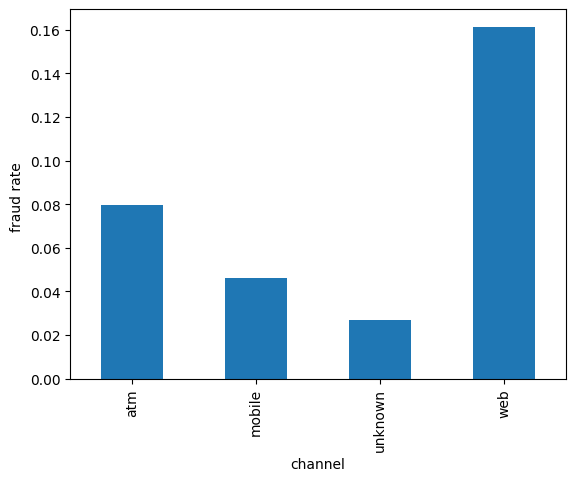

In [605]:
# lets do a visualisation on the channel features and is fraud .

df.groupby('channel')['is_fraud'].mean().plot.bar()
plt.xlabel("channel")
plt.ylabel("fraud rate ")
plt.show()


In [606]:
df['kyc_tier'].unique()

array(['standard', 'enhanced', 'low', ' standard  ', 'standrd',
       ' enhanced  ', 'STANDARD', 'NAN', 'unknown', 'enhancd', ' low  ',
       'ENHANCED', 'LOW', ' nan  '], dtype=object)

In [607]:
if 'kyc_tier' in df.columns:

    df['kyc_tier'] = df['kyc_tier'].str.lower().str.strip()
    df['kyc_tier'] = df['kyc_tier'].str.replace('standrd', 'standard')
    df['kyc_tier'] = df['kyc_tier'].str.replace('enhancd', 'enhanced')

df['kyc_tier'].unique()

array(['standard', 'enhanced', 'low', 'nan', 'unknown'], dtype=object)

In [608]:
df['kyc_tier'].unique().tolist()

df['kyc_tier'].value_counts()

,count
kyc_tier,
standard,8391
enhanced,1866
low,1048
unknown,31
nan,3


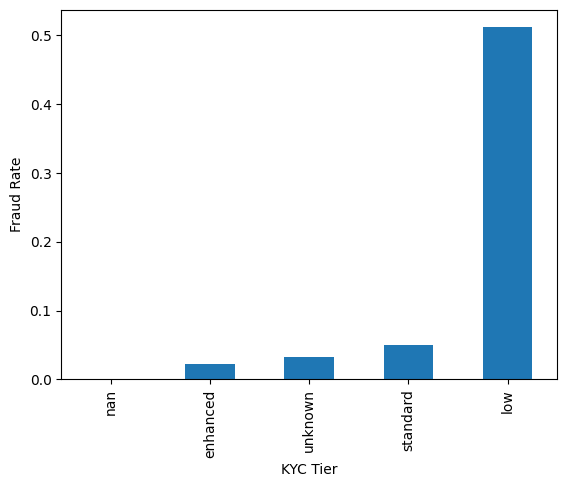

In [609]:
df.groupby('kyc_tier')['is_fraud'].mean().sort_values(ascending=True).plot.bar()
plt.xlabel("KYC Tier")
plt.ylabel("Fraud Rate")
plt.show()

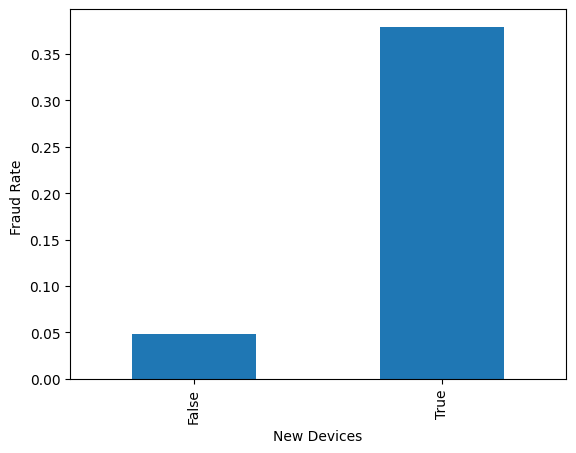

In [610]:
df.groupby('new_device')['is_fraud'].mean().plot.bar()
plt.xlabel("New Devices")
plt.ylabel("Fraud Rate ")
plt.show()

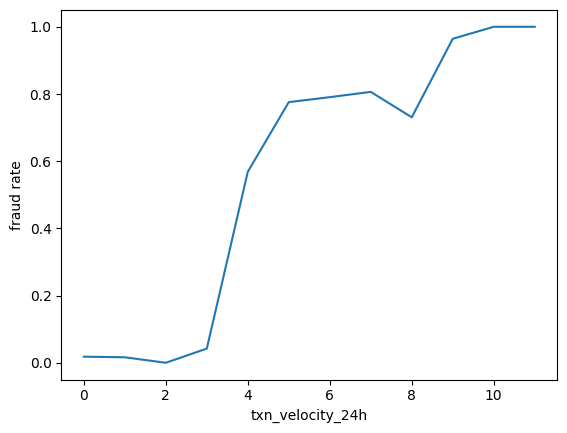

In [611]:
df.groupby('txn_velocity_24h')['is_fraud'].mean().plot.line()
plt.xlabel("txn_velocity_24h")
plt.ylabel("fraud rate")
plt.show()

In [612]:
if 'home_country' in df.columns:

    df['home_country'] = df['home_country'].str.lower().str.strip()

df['home_country'].unique()


array(['us', 'ca', 'uk', 'unknown'], dtype=object)

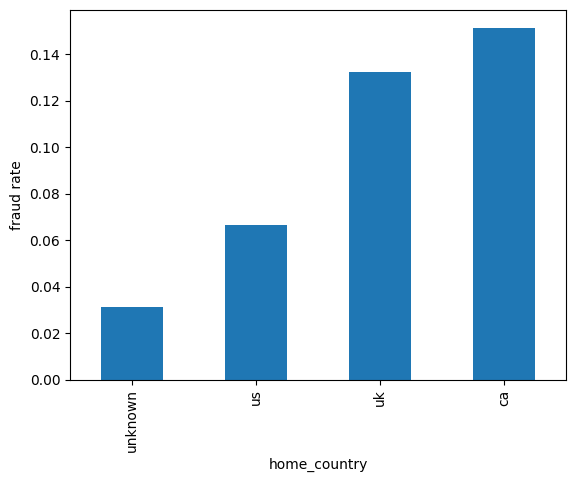

In [613]:
df.groupby('home_country')['is_fraud'].mean().sort_values(ascending=True).plot.bar()
plt.xlabel("home_country")
plt.ylabel("fraud rate")
plt.show()

Bivariate Analysis

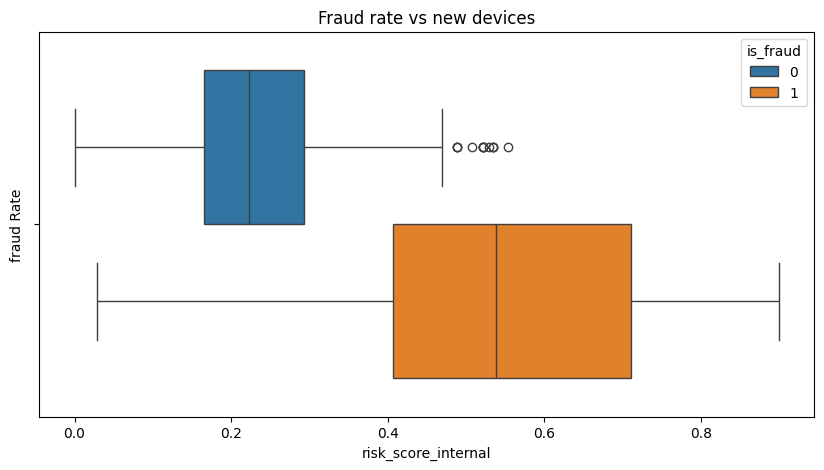

In [614]:
plt.figure(figsize =(10,5))
sns.boxplot(x="risk_score_internal" ,data=df , hue="is_fraud")
plt.xlabel("risk_score_internal")
plt.ylabel("fraud Rate")
plt.title("Fraud rate vs new devices");


In [615]:
df.columns.to_list()

['transaction_id',
 'customer_id',
 'timestamp',
 'home_country',
 'source_currency',
 'dest_currency',
 'channel',
 'amount_src',
 'amount_usd',
 'fee',
 'exchange_rate_src_to_dest',
 'device_id',
 'new_device',
 'ip_address',
 'ip_country',
 'location_mismatch',
 'ip_risk_score',
 'kyc_tier',
 'account_age_days',
 'device_trust_score',
 'chargeback_history_count',
 'risk_score_internal',
 'txn_velocity_1h',
 'txn_velocity_24h',
 'corridor_risk',
 'is_fraud']

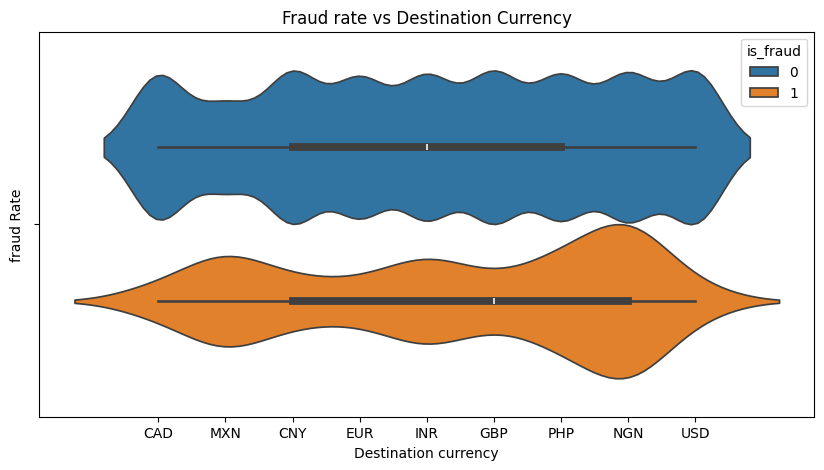

In [616]:
plt.figure(figsize =(10,5))
sns.violinplot(x="dest_currency" ,data=df , hue="is_fraud")
plt.xlabel("Destination currency")
plt.ylabel("fraud Rate")
plt.title("Fraud rate vs Destination Currency");

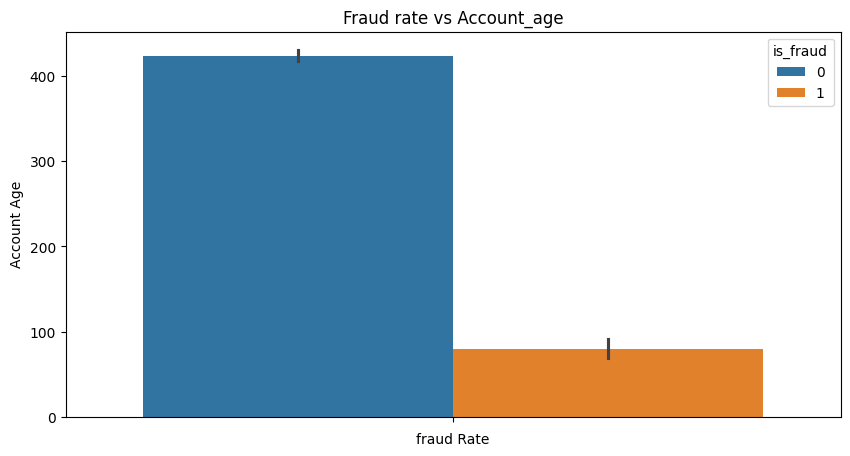

In [617]:
plt.figure(figsize =(10,5))
sns.barplot(y="account_age_days" ,data=df , hue="is_fraud")
plt.ylabel("Account Age")
plt.xlabel("fraud Rate")
plt.title("Fraud rate vs Account_age");

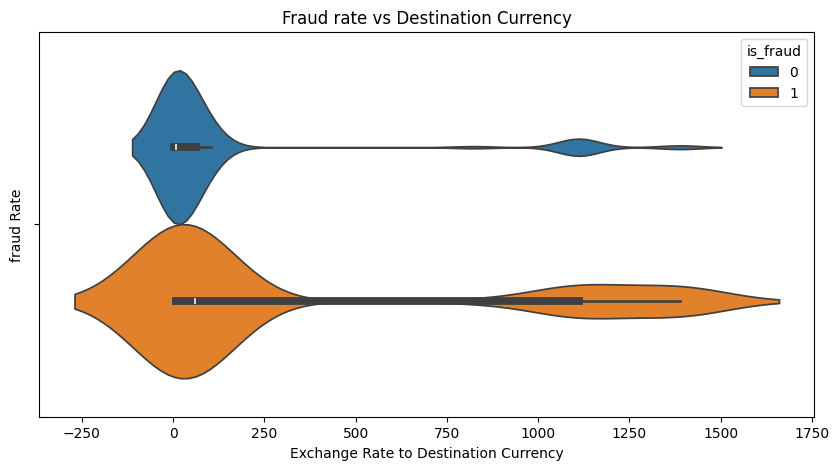

In [618]:
plt.figure(figsize =(10,5))
sns.violinplot(x="exchange_rate_src_to_dest" ,data=df , hue="is_fraud")
plt.xlabel("Exchange Rate to Destination Currency")
plt.ylabel("fraud Rate")
plt.title("Fraud rate vs Destination Currency");

txn_velocity_24h
0     0.018154
1     0.016355
2     0.000000
3     0.042254
4     0.568345
5     0.775758
6     0.790514
7     0.806283
8     0.730539
9     0.964286
10    1.000000
11    1.000000
Name: is_fraud, dtype: float64


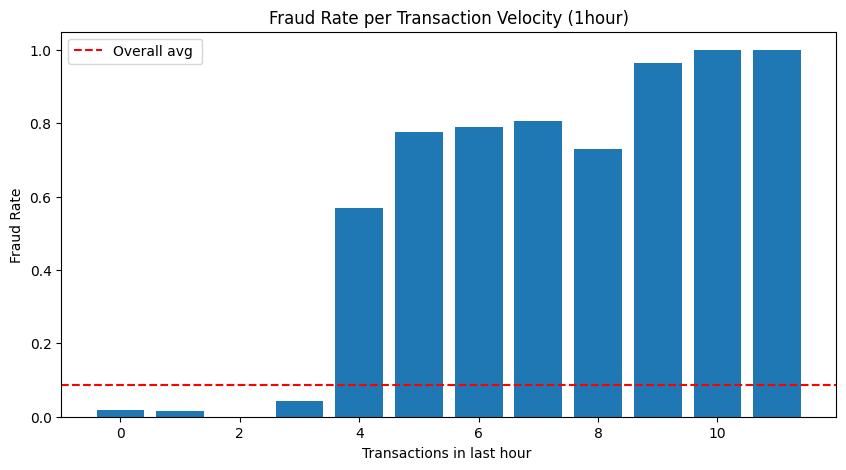

In [619]:
#fraud rate by velocity (transactions one by the last hour )

fraud_by_velocity = df.groupby('txn_velocity_24h', observed=False)['is_fraud'].mean()
print(fraud_by_velocity)

plt.figure(figsize=(10,5))
plt.bar(fraud_by_velocity.index, fraud_by_velocity.values)
plt.xlabel("Transactions in last hour ")
plt.ylabel("Fraud Rate")
plt.title("Fraud Rate per Transaction Velocity (1hour)")
plt.axhline(df['is_fraud'].mean(), color='r', linestyle='--', label='Overall avg ')
plt.legend()
plt.show()

Feature engineering

---






In [620]:
df["timestamp"].unique()

array(['2022-10-03 18:40:59.468549+00:00',
       '2022-10-03 20:39:38.468549+00:00',
       '2022-10-03 23:02:43.468549+00:00', ...,
       '2025-11-27 06:19:11.573611+00:00',
       '2025-11-28 00:53:28.573611+00:00',
       '2025-11-29 20:10:47.573611+00:00'], dtype=object)

In [621]:
# Extract time based features from timestamp
#Extract the hour , dayof the week and weeked indicator from the timestamp.

#*   Hour (0-23)
#*   Day of the week ( 0=Mon, 6=Sun
#*   Is_weekend becomes 1 for Sat, Sun else 0

df['hour'] = pd.to_datetime(df['timestamp']).dt.hour
df['day_of_week'] = pd.to_datetime(df['timestamp']).dt.dayofweek
df['is_weekend'] = df['day_of_week'].apply(lambda x: 1 if x in [5,6] else 0)

print('time features extracted')
print(df[['timestamp','hour',"day_of_week", 'is_weekend']].head(5))
print("\nHour distribution:")
print(df['hour'].value_counts().sort_index())

time features extracted
                          timestamp  hour  day_of_week  is_weekend
0  2022-10-03 18:40:59.468549+00:00    18            0           0
1  2022-10-03 20:39:38.468549+00:00    20            0           0
2  2022-10-03 23:02:43.468549+00:00    23            0           0
3  2022-10-04 01:08:53.468549+00:00     1            1           0
4  2022-10-04 09:35:03.468549+00:00     9            1           0

Hour distribution:
hour
0     472
1     419
2     432
3     504
4     520
5     494
6     486
7     464
8     501
9     445
10    474
11    452
12    467
13    471
14    442
15    485
16    476
17    447
18    485
19    520
20    465
21    444
22    470
23    504
Name: count, dtype: int64


<module 'matplotlib.pyplot' from '/usr/local/lib/python3.12/dist-packages/matplotlib/pyplot.py'>

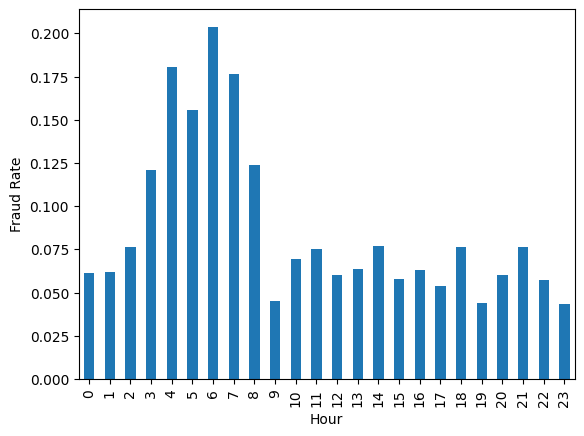

In [622]:
#compare the hour of the day and fraud

df.groupby('hour')['is_fraud'].mean().plot.bar()
plt.xlabel("Hour")
plt.ylabel("Fraud Rate")
plt

hour
0     0.061441
1     0.062053
2     0.076389
3     0.121032
4     0.180769
5     0.155870
6     0.203704
7     0.176724
8     0.123752
9     0.044944
10    0.069620
11    0.075221
12    0.059957
13    0.063694
14    0.076923
15    0.057732
16    0.063025
17    0.053691
18    0.076289
19    0.044231
20    0.060215
21    0.076577
22    0.057447
23    0.043651
Name: is_fraud, dtype: float64


<function matplotlib.pyplot.show(close=None, block=None)>

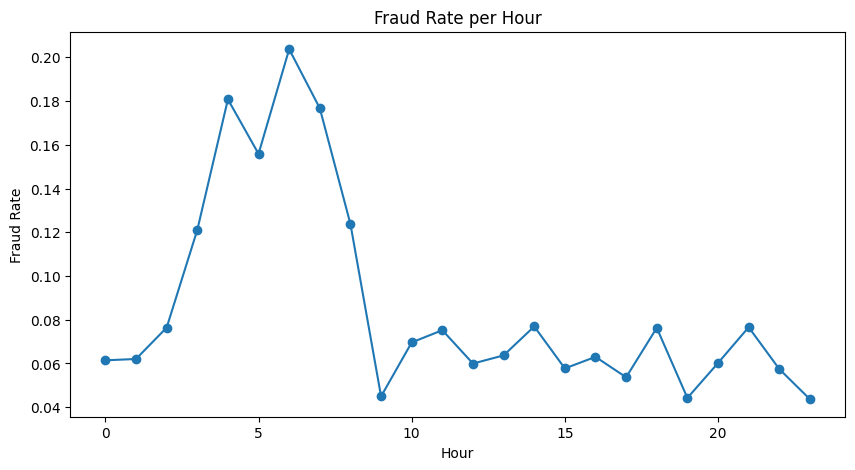

In [623]:
# get the fraud rate per hour

fraud_per_hour = df.groupby('hour')['is_fraud'].mean()
print(fraud_per_hour)

plt.figure(figsize=(10,5))
plt.plot(fraud_per_hour.index, fraud_per_hour.values, marker='o')
plt.xlabel('Hour')
plt.ylabel('Fraud Rate')
plt.title('Fraud Rate per Hour')
plt.show

In [624]:
df['account_age_days'].describe()

,account_age_days
count,11339.000000
mean,393.852544
std,342.314834
min,1.000000
25%,147.000000
50%,298.000000
75%,661.000000
max,1095.000000


age_group
<30d        0.352054
30-90d      0.435597
90-180d     0.025717
180-365d    0.016608
>1yr        0.010453
Name: is_fraud, dtype: float64


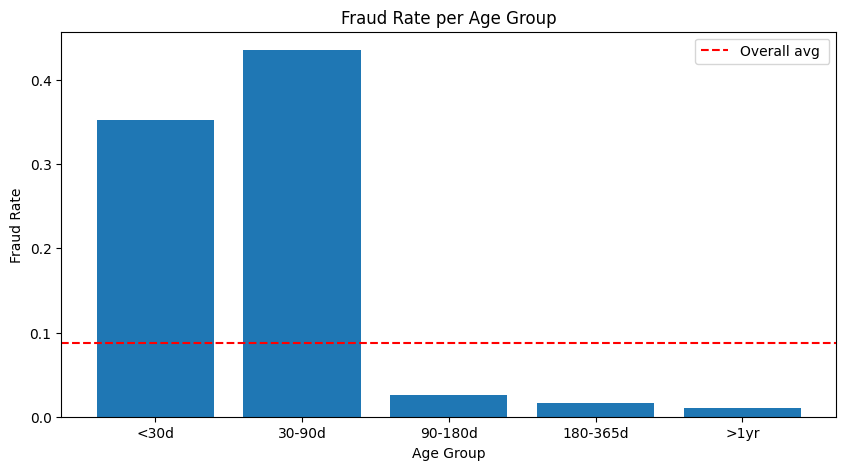

In [625]:
# Creates bins or buckets to age group data and do analaysis

#Plot a bar chart showing rate per age category

df['age_group']=pd.cut(df['account_age_days'],
                       bins=[0,30,90,180,365,2000],
                       labels=['<30d','30-90d','90-180d','180-365d','>1yr'])

fraud_by_age_group = df.groupby('age_group', observed=False)['is_fraud'].mean()
print(fraud_by_age_group)

plt.figure(figsize=(10,5))
plt.bar(fraud_by_age_group.index, fraud_by_age_group.values)
plt.xticks(range(len(fraud_by_age_group)), fraud_by_age_group.index)
plt.xlabel('Age Group')
plt.ylabel('Fraud Rate')
plt.title('Fraud Rate per Age Group')
plt.axhline(df['is_fraud'].mean(), color='r', linestyle='--', label='Overall avg ')
plt.legend()
plt.show()

In [626]:
df['amount_usd'].describe()

,amount_usd
count,11339.000000
mean,449.520060
std,1397.188131
min,-374.200963
25%,92.470000
50%,163.510000
75%,302.480682
max,12607.258611


amount_bins
<$100        0.018285
$100-$500    0.059846
$500-$1k     0.286223
$1k-$2k      0.656827
$2k-$5k      0.943820
>5k          0.135965
Name: is_fraud, dtype: float64


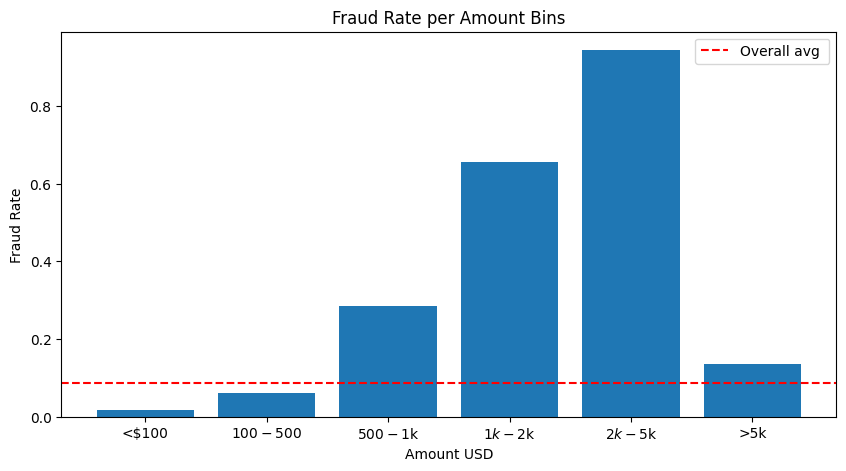

In [627]:
# fraud amounts by amounts usd bins/buckets

df['amount_bins']=pd.cut(df['amount_usd'],
                       bins=[0,100,500,1000,2000,5000, np.inf],
                        labels=['<$100','$100-$500','$500-$1k','$1k-$2k','$2k-$5k','>5k'])

fraud_by_amount = df.groupby('amount_bins', observed=False)['is_fraud'].mean()
print(fraud_by_amount)


plt.figure(figsize=(10,5))
plt.bar(range(len(fraud_by_amount)),fraud_by_amount.values)
plt.xticks(range(len(fraud_by_amount)), fraud_by_amount.index)
plt.xlabel('Amount USD')
plt.ylabel('Fraud Rate')
plt.title('Fraud Rate per Amount Bins')
plt.axhline(df['is_fraud'].mean(), color='r', linestyle='--', label='Overall avg ')
plt.legend()
plt.show()

In [628]:
df['ip_risk_score'].describe()

,ip_risk_score
count,11339.000000
mean,0.396975
std,0.270885
min,0.004000
25%,0.209000
50%,0.325000
75%,0.487000
max,1.200000


ip_risk_score_count
low <0.3     0.014896
0.3-0.5      0.022535
0.5-0.7      0.029520
0.7-0.9      0.223214
High >0.9    0.612121
Name: is_fraud, dtype: float64


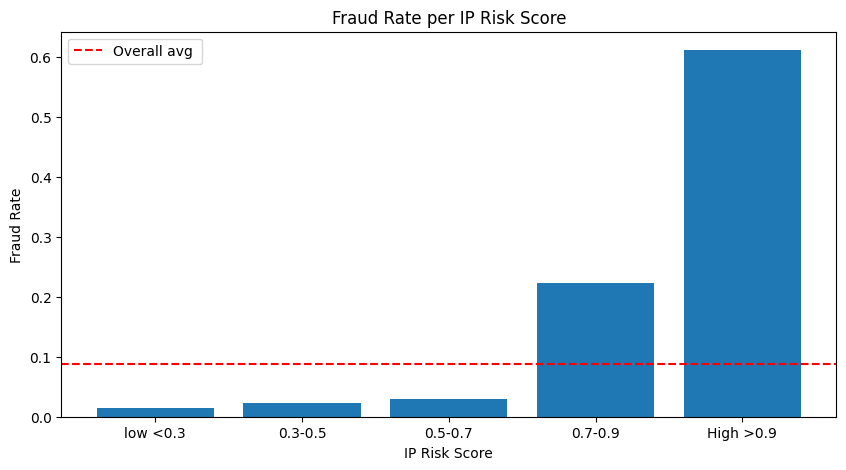

In [629]:
#fraud rate by ip risk score. Create bins/buckets for better analysis

df['ip_risk_score_count']=pd.cut(df['ip_risk_score'],
                       bins=[0,0.3,0.5,0.7,0.9, 1.2],
                           labels=['low <0.3','0.3-0.5','0.5-0.7','0.7-0.9','High >0.9'])

fraud_by_ip_risk_score = df.groupby('ip_risk_score_count', observed=False)['is_fraud'].mean()
print(fraud_by_ip_risk_score)

plt.figure(figsize=(10,5))
plt.bar(range(len(fraud_by_ip_risk_score)),fraud_by_ip_risk_score.values)
plt.xticks(range(len(fraud_by_ip_risk_score)), fraud_by_ip_risk_score.index)
plt.xlabel('IP Risk Score')
plt.ylabel('Fraud Rate')
plt.title('Fraud Rate per IP Risk Score')
plt.axhline(df['is_fraud'].mean(), color='r', linestyle='--', label='Overall avg ')
plt.legend()
plt.show()

In [630]:
df['device_trust_score'].describe()

,device_trust_score
count,11339.000000
mean,0.652236
std,0.270023
min,-0.100000
25%,0.515000
50%,0.625000
75%,0.894000
max,0.999000


device_score_buckets
low <0.3     0.846260
0.3-0.5      0.109581
0.5-0.7      0.021100
0.7-0.9      0.032696
High >0.9    0.008096
Name: is_fraud, dtype: float64


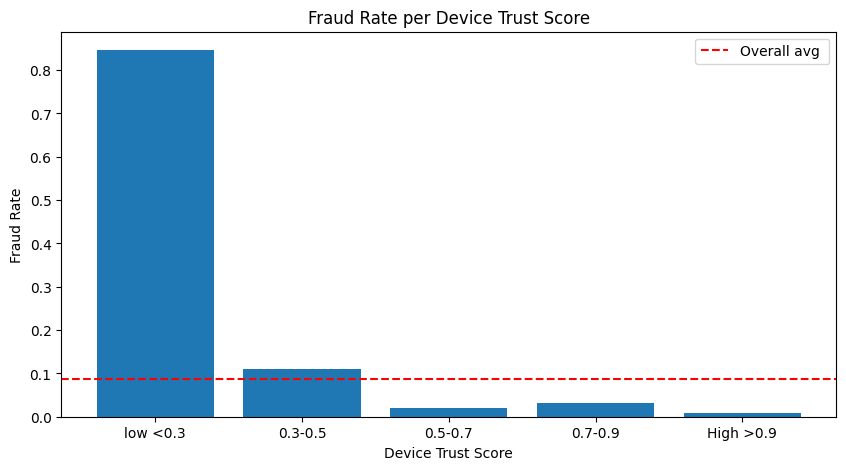

In [631]:
# fraud rate by device score buckets vs fraud

df['device_score_buckets']= pd.cut(df['device_trust_score'],
                                   bins=[0,0.3,0.5,0.7,0.9, 1.0],
                                   labels=['low <0.3','0.3-0.5', '0.5-0.7','0.7-0.9','High >0.9'])

fraud_by_device_score = df.groupby('device_score_buckets', observed=False)['is_fraud'].mean()
print(fraud_by_device_score)

plt.figure(figsize=(10,5))
plt.bar(range(len(fraud_by_device_score)),fraud_by_device_score.values)
plt.xticks(range(len(fraud_by_device_score)), fraud_by_device_score.index)
plt.xlabel('Device Trust Score')
plt.ylabel('Fraud Rate')
plt.title('Fraud Rate per Device Trust Score')
plt.axhline(df['is_fraud'].mean(), color='r', linestyle='--', label='Overall avg ')
plt.legend()
plt.show()


In [632]:
#based on our previous analysis , Lets create threshold based features

df['night_hours'] = (df['hour'] >=3 & (df['hour'] <=7)).astype(int)
df['account_very_new'] = (df['account_age_days'] <30 ).astype(int)
df['account_new'] = ((df['account_age_days'] >=30) & (df['account_age_days'] <90)).astype(int)
df['velocity_burst'] = (df['txn_velocity_1h'] >=3 ).astype(int)
df['amount_high'] = (df['amount_usd'] >=2000 ).astype(int)
df['ip_high_risk'] = (df['ip_risk_score'] >0.8 ).astype(int)
df['device_low_trust'] = (df['device_trust_score'] < 0.5 ).astype(int)

print('features created')

features created


In [633]:
df.columns

Index(['transaction_id', 'customer_id', 'timestamp', 'home_country',
       'source_currency', 'dest_currency', 'channel', 'amount_src',
       'amount_usd', 'fee', 'exchange_rate_src_to_dest', 'device_id',
       'new_device', 'ip_address', 'ip_country', 'location_mismatch',
       'ip_risk_score', 'kyc_tier', 'account_age_days', 'device_trust_score',
       'chargeback_history_count', 'risk_score_internal', 'txn_velocity_1h',
       'txn_velocity_24h', 'corridor_risk', 'is_fraud', 'hour', 'day_of_week',
       'is_weekend', 'age_group', 'amount_bins', 'ip_risk_score_count',
       'device_score_buckets', 'night_hours', 'account_very_new',
       'account_new', 'velocity_burst', 'amount_high', 'ip_high_risk',
       'device_low_trust'],
      dtype='object')

In [634]:
numerical_features

['amount_src',
 'amount_usd',
 'fee',
 'ip_risk_score',
 'device_trust_score',
 'account_age_days',
 'txn_velocity_1h',
 'txn_velocity_24h',
 'corridor_risk',
 'risk_score_internal',
 'hour',
 'day_of_week',
 'is_weekend',
 'night_hours',
 'account_very_new',
 'account_new',
 'velocity_burst',
 'amount_high',
 'ip_high_risk',
 'device_low_trust',
 'new_device',
 'location_mismatch']

# Task


```python
#fraud rate by ip risk score. Create bins/buckets for better analysis


```

In [635]:
df['location_mismatch'].head(

)

,location_mismatch
0,False
1,False
2,False
3,False
4,False


ip_risc_score_count
low <0.3     0.014896
0.3-0.5      0.022535
0.5-0.7      0.029520
0.7-0.9      0.223214
High >0.9    0.612121
Name: is_fraud, dtype: float64


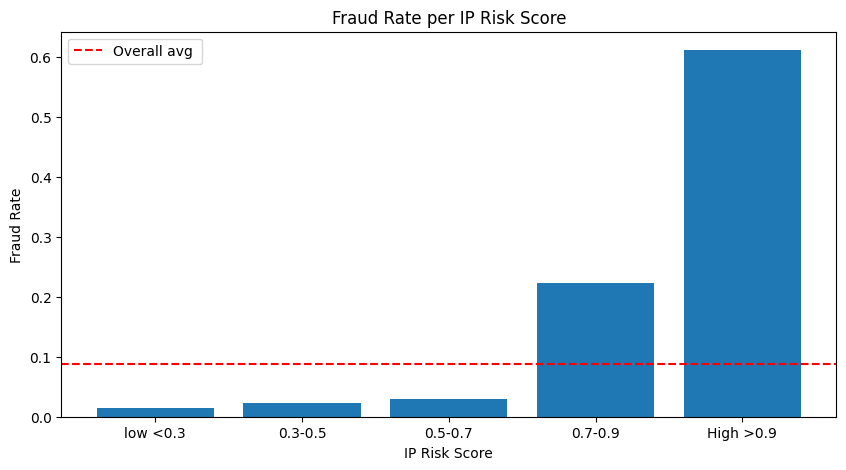

In [636]:
#fraud rate by ip risk score. Create bins/buckets for better analysis

df['ip_risc_score_count']=pd.cut(df['ip_risk_score'],
                       bins=[0,0.3,0.5,0.7,0.9, 1.2],
                           labels=['low <0.3','0.3-0.5','0.5-0.7','0.7-0.9','High >0.9'])

fraud_by_ip_risk_score = df.groupby('ip_risc_score_count', observed=False)['is_fraud'].mean()
print(fraud_by_ip_risk_score)

plt.figure(figsize=(10,5))
plt.bar(range(len(fraud_by_ip_risk_score)),fraud_by_ip_risk_score.values)
plt.xticks(range(len(fraud_by_ip_risk_score)), fraud_by_ip_risk_score.index)
plt.xlabel('IP Risk Score')
plt.ylabel('Fraud Rate')
plt.title('Fraud Rate per IP Risk Score')
plt.axhline(df['is_fraud'].mean(), color='r', linestyle='--', label='Overall avg ')
plt.legend()
plt.show()

In [637]:
df['night_hours'] = (df['hour'] >=3 & (df['hour'] <=7)).astype(int)
df['account_very_new'] = (df['account_age_days'] <30 ).astype(int)
df['account_new'] = ((df['account_age_days'] >=30) & (df['account_age_days'] <90)).astype(int)
df['velocity_burst'] = (df['txn_velocity_1h'] >=3 ).astype(int)
df['amount_high'] = (df['amount_usd'] >=2000 ).astype(int)
df['ip_high_risk'] = (df['ip_risk_score'] >0.8 ).astype(int)
df['device_low_trust'] = (df['device_trust_score'] < 0.5 ).astype(int)

print('features created')
print(df[['night_hours','account_very_new','account_new','velocity_burst','amount_high','ip_high_risk','device_low_trust']].describe())

features created
        night_hours  account_very_new   account_new  velocity_burst  \
count  11339.000000      11339.000000  11339.000000    11339.000000   
mean       0.958374          0.169063      0.030514        0.094276   
std        0.199742          0.374824      0.172005        0.292226   
min        0.000000          0.000000      0.000000        0.000000   
25%        1.000000          0.000000      0.000000        0.000000   
50%        1.000000          0.000000      0.000000        0.000000   
75%        1.000000          0.000000      0.000000        0.000000   
max        1.000000          1.000000      1.000000        1.000000   

        amount_high  ip_high_risk  device_low_trust  
count  11339.000000  11339.000000      11339.000000  
mean       0.027957      0.128671          0.241732  
std        0.164856      0.334850          0.428152  
min        0.000000      0.000000          0.000000  
25%        0.000000      0.000000          0.000000  
50%        0.000000

In [638]:
print(num_cols)

print(cat_cols)

Index(['amount_src', 'amount_usd', 'fee', 'exchange_rate_src_to_dest',
       'new_device', 'location_mismatch', 'ip_risk_score', 'account_age_days',
       'device_trust_score', 'chargeback_history_count', 'risk_score_internal',
       'txn_velocity_1h', 'txn_velocity_24h', 'corridor_risk', 'is_fraud'],
      dtype='object')
Index(['transaction_id', 'customer_id', 'timestamp', 'home_country',
       'source_currency', 'dest_currency', 'channel', 'device_id',
       'ip_address', 'ip_country', 'kyc_tier'],
      dtype='object')


In [639]:
# Drop temporary bucket columns and select final features

df= df.drop(['age_group','amount_bins','ip_risc_score_count','device_score_buckets'], axis=1)

# Define the feature sets



all_features = categorical_features + numerical_features

print(f"Total features : {len(all_features)}")
print(f'Categorical features : {len(categorical_features)}')
print(f'Numerical features : {len(numerical_features)}')
print(f'\nDastaset Shape: {df.shape}')
#

Total features : 27
Categorical features : 5
Numerical features : 22

Dastaset Shape: (11339, 37)


In [641]:
output_path = '/content/drive/MyDrive/Data Science Internship/Analysed_data_nova_pay_Combined.csv'
df.to_csv(output_path, index=False)

# Modelling

In [ ]:
# sort the dataframe chronologically by timestamp to avoid data leakage

df= df.sort_values(by='timestamp').reset_index(drop=True)

In [ ]:
#split the data into 80% and 20% testing based on time

split_idx = int(len(df)*0.8)
train_df = df.iloc[:split_idx].copy()
test_df = df.iloc[split_idx:].copy()

print(f'Train : {len(train_df)}) rows ({train_df['is_fraud'].sum()} fraud, {train_df['is_fraud'].mean():.3f} rate)')
print(f'Test : {len(test_df)} rows ({test_df['is_fraud'].sum()} fraud, {test_df['is_fraud'].mean():.3f} rate)')


#prepare x and y

x_train = train_df[all_features]
y_train = train_df['is_fraud']
x_test = test_df[all_features]
y_test = test_df['is_fraud']

print(f'\nx_train:  (x_train.shape), y_train: {y_train.shape}')
print(f'x_test:  (x_test.shape), y_test: {y_test.shape}')

Train : 9071) rows (686 fraud, 0.076 rate)
Test : 2268 rows (309 fraud, 0.136 rate)

x_train:  (x_train.shape), y_train: (9071,)
x_test:  (x_test.shape), y_test: (2268,)


In [ ]:
# Noted a duplicate column causing error in scaling ( New devices )

categorical_features = ['channel','kyc_tier','home_country', 'dest_currency','ip_country']

numerical_features = ['amount_src', 'amount_usd', 'fee', 'ip_risk_score',
                      'device_trust_score','account_age_days','txn_velocity_1h',
                      'txn_velocity_24h', 'corridor_risk', 'risk_score_internal',
                      'hour','day_of_week','is_weekend','night_hours',
                      'account_very_new','account_new','velocity_burst',
                      'amount_high','ip_high_risk','device_low_trust',
                      'new_device', 'location_mismatch']

all_features = categorical_features + numerical_features

# Re-create x_train and x_test with the updated feature lists
x_train = train_df[all_features]
y_train = train_df['is_fraud']
x_test = test_df[all_features]
y_test = test_df['is_fraud']

print(f"Total features : {len(all_features)}")
print(f'Categorical features : {len(categorical_features)}')
print(f'Numerical features : {len(numerical_features)}')
print(f'x_train shape: {x_train.shape}, y_train shape: {y_train.shape}')
print(f'x_test shape: {x_test.shape}, y_test shape: {y_test.shape}')


Total features : 27
Categorical features : 5
Numerical features : 22
x_train shape: (9071, 27), y_train shape: (9071,)
x_test shape: (2268, 27), y_test shape: (2268,)


In [ ]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# building processing pipelines

preprocesser = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(drop ="first" , sparse_output = False, handle_unknown ='ignore'),
         categorical_features)
    ]
)


# fit on train , transform both

x_train_processed = preprocesser.fit_transform(x_train)
x_test_processed = preprocesser.transform(x_test)

print(f'x_train_processed: {x_train_processed.shape}')
print (f'Original Features: {len(all_features)}, After encoding: {x_train_processed.shape[1]}')

x_train_processed: (9071, 48)
Original Features: 27, After encoding: 48


In [ ]:
# import logistic regression

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score
from sklearn.metrics import confusion_matrix, classification_report

# train logistic regression with balanced weights

lr_model = LogisticRegression(class_weight='balanced', max_iter = 1000 , random_state=42)
lr_model.fit(x_train_processed, y_train)

#predicton test

y_pred = lr_model.predict(x_test_processed)
y_pred_proba = lr_model.predict_proba(x_test_processed)[:,1]

#evaluation

print('logistic Regression Results : ')
print("\nConfusion Matrix: ")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report: ")
print(classification_report(y_test, y_pred, target_names =["legit", "Fraud"]))
print(f"\nROC-AUC: {roc_auc_score(y_test, y_pred_proba):.4f}")

logistic Regression Results : 

Confusion Matrix: 
[[1856  103]
 [  17  292]]

Classification Report: 
              precision    recall  f1-score   support

       legit       0.99      0.95      0.97      1959
       Fraud       0.74      0.94      0.83       309

    accuracy                           0.95      2268
   macro avg       0.87      0.95      0.90      2268
weighted avg       0.96      0.95      0.95      2268


ROC-AUC: 0.9816


In [ ]:
from uuid import RFC_4122
# import Random Forest Classifier

from sklearn.ensemble import RandomForestClassifier

# Train Random forest classifier with balanced weights

rf_model = RandomForestClassifier(class_weight='balanced',
                                  n_estimators=100,
                                  max_depth=10,
                                  random_state=42,
                                  n_jobs =-1)
rf_model.fit(x_train_processed, y_train)

#prediction test
y_pred = rf_model.predict(x_test_processed)
y_pred_proba = rf_model.predict_proba(x_test_processed)[:,1]

#evaluation
print('Random Forest Results : ')
print("\nConfusion Matrix: ")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report: ")
print(classification_report(y_test, y_pred, target_names =["legit", "Fraud"]))
print(f"\nROC-AUC: {roc_auc_score(y_test, y_pred_proba):.4f}")


Random Forest Results : 

Confusion Matrix: 
[[1956    3]
 [  26  283]]

Classification Report: 
              precision    recall  f1-score   support

       legit       0.99      1.00      0.99      1959
       Fraud       0.99      0.92      0.95       309

    accuracy                           0.99      2268
   macro avg       0.99      0.96      0.97      2268
weighted avg       0.99      0.99      0.99      2268


ROC-AUC: 0.9760


In [ ]:
# Import XGBoost

from xgboost import XGBClassifier

# Calculate scale_pos_weight for imbalance

scale_pos_weight = (y_train == 0).sum() / (y_train == 1).sum()

# Train XGBoost classifier with balanced weights

xgb_model = XGBClassifier(scale_pos_weight=scale_pos_weight,
                          max_depth= 6,
                          learning_rate = 0.1,
                          random_state = 42,
                          eval_metric ="logloss"
)
xgb_model.fit(x_train_processed, y_train)

#predict on test
y_pred = xgb_model.predict(x_test_processed)
y_pred_proba = xgb_model.predict_proba(x_test_processed)[:,1]

#evaluation
print('XGBoost Results : ')
print("\nConfusion Matrix: ")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report: ")
print(classification_report(y_test, y_pred, target_names =["legit", "Fraud"]))
print(f"\nROC-AUC: {roc_auc_score(y_test, y_pred_proba):.4f}")



XGBoost Results : 

Confusion Matrix: 
[[1945   14]
 [  26  283]]

Classification Report: 
              precision    recall  f1-score   support

       legit       0.99      0.99      0.99      1959
       Fraud       0.95      0.92      0.93       309

    accuracy                           0.98      2268
   macro avg       0.97      0.95      0.96      2268
weighted avg       0.98      0.98      0.98      2268


ROC-AUC: 0.9642


In [ ]:
# Import Lightgbm Classifier

from lightgbm import LGBMClassifier

#train LightGBM

lgbm_model = LGBMClassifier(
    n_estimators =100,
    max_depth = 6,
    learning_rate = 0.1,
    random_state = 42,
    class_weight = 'balanced',
    verbosity = -1
)

lgbm_model.fit(x_train_processed, y_train)

# predict on test
y_pred = lgbm_model.predict(x_test_processed)
y_pred_proba = lgbm_model.predict_proba(x_test_processed)[:,1]

#evaluation
print('LightGBM Results : ')
print("\nConfusion Matrix: ")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report: ")
print(classification_report(y_test, y_pred, target_names =["legit", "Fraud"]))
print(f"\nROC-AUC: {roc_auc_score(y_test, y_pred_proba):.4f}")

LightGBM Results : 

Confusion Matrix: 
[[1935   24]
 [  26  283]]

Classification Report: 
              precision    recall  f1-score   support

       legit       0.99      0.99      0.99      1959
       Fraud       0.92      0.92      0.92       309

    accuracy                           0.98      2268
   macro avg       0.95      0.95      0.95      2268
weighted avg       0.98      0.98      0.98      2268


ROC-AUC: 0.9648


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


### Hyperameter Tuning


In [ ]:
# Random forest hyperameter tuning

# import randomized search vc

from sklearn import metrics
from sklearn.model_selection import RandomizedSearchCV


print ('Starting Random Forest Hyperameter Tuning ...\n')

#parameter Grid

param_dist = {
    'n_estimators' : [100,200,300],
    "max_depth" : [10, 10,30,None],
    "min_samples_split" :  [2,5,10],
    "min_samples_leaf" : [1,2,4],
    "max_features" : ["sqrt", "log2"],
    "class_weight" : ["balanced"]
}

# RandomizedSearchCV

rf_tuned = RandomizedSearchCV(
    RandomForestClassifier(random_state = 42),
    param_distributions = param_dist,
    n_iter = 25,
    scoring = 'f1',
    n_jobs = -1,
    cv = 3,
    random_state = 42,
    verbose = 1
)

rf_tuned.fit(x_train_processed, y_train)

print(f'Best parameters: {rf_tuned.best_params_}')

for param, value in rf_tuned.best_params_.items():
    print(f'{param}: {value}')


print(f'\nBest CV F1-score: {rf_tuned.best_score_:.4f}')



Starting Random Forest Hyperameter Tuning ...

Fitting 3 folds for each of 25 candidates, totalling 75 fits
Best parameters: {'n_estimators': 100, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 30, 'class_weight': 'balanced'}
n_estimators: 100
min_samples_split: 5
min_samples_leaf: 1
max_features: sqrt
max_depth: 30
class_weight: balanced

Best CV F1-score: 0.8492


In [ ]:
#evaluate the tuned model on test set

y_pred_tuned = rf_tuned.predict(x_test_processed)
y_pred_proba_tuned = rf_tuned.predict_proba(x_test_processed)


print("="*60)
print('Tuned Random Forest Results : ')
print("="*60)
print("\nConfusion Matrix: ")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report: ")
print(classification_report(y_test, y_pred_tuned,
                            target_names =["legit", "Fraud"]))

roc_auc_tuned = roc_auc_score(y_test, y_pred_proba_tuned[:,1])
print(f"\nROC-AUC: {roc_auc_score(y_test, y_pred_proba):.4f}")
print(f'ROC-AUC (Tuned): {roc_auc_tuned:.4f}')


Tuned Random Forest Results : 

Confusion Matrix: 
[[1935   24]
 [  26  283]]

Classification Report: 
              precision    recall  f1-score   support

       legit       0.99      1.00      0.99      1959
       Fraud       0.99      0.92      0.95       309

    accuracy                           0.99      2268
   macro avg       0.99      0.96      0.97      2268
weighted avg       0.99      0.99      0.99      2268


ROC-AUC: 0.9648
ROC-AUC (Tuned): 0.9744


## SHAP( SHapley Additive exPlanations)


Lets know which features have most importance for stakeholder Explanability.

In [ ]:
# lets import SHAP

import shap

print(shap.__version__)

0.50.0


In [ ]:
# Lets create SHAP explainer for random forest

explainer_rf = shap.TreeExplainer(rf_model)

#Calculate SHAP values for the test set ( sample 100 for speed)

shap_values_rf = explainer_rf.shap_values(x_test_processed[:100])

print(f'Shap Values Shape: {shap_values_rf.shape}')
print("Explainer ready for Random Forest")


Shap Values Shape: (100, 48, 2)
Explainer ready for Random Forest


In [ ]:
# Getting feature names after preprocessing

catshap_features =preprocesser.named_transformers_['cat'].get_feature_names_out(categorical_features)

numshap_features = numerical_features

shap_features = np.concatenate([catshap_features, numshap_features])

print(f' Total features after encoding: {len(shap_features)}')
print("First 10 features: (",shap_features[:10],")")

 Total features after encoding: 48
First 10 features: ( ['channel_mobile' 'channel_unknown' 'channel_web' 'kyc_tier_low'
 'kyc_tier_nan' 'kyc_tier_standard' 'kyc_tier_unknown' 'home_country_uk'
 'home_country_unknown' 'home_country_us'] )


In [ ]:
# Interprating SHAP values for fraud values

# Extract SHAP values (class 1)

shap_values_fraud  = shap_values_rf[:,:,1]

# Calculate mean absolute SHAP values
mean_shap = np.abs(shap_values_fraud).mean(axis=0)

# create feature importance dataframe

feature_importance_df = pd.DataFrame({
    'feature': shap_features,
    'importance': mean_shap
}).sort_values(by='importance', ascending=False)

print("\nTop 15 Most important Features: ")
print(feature_importance_df.head(15).to_string(index=False))




Top 15 Most important Features: 
           feature  importance
 kyc_tier_standard    0.059617
      kyc_tier_low    0.051549
   home_country_uk    0.045551
  kyc_tier_unknown    0.044969
   home_country_us    0.040370
 dest_currency_PHP    0.038110
  ip_country_ US      0.024544
      kyc_tier_nan    0.021681
 dest_currency_MXN    0.019648
  ip_country_ UK      0.019005
       channel_web    0.017262
    channel_mobile    0.017077
ip_country_unknown    0.014249
   channel_unknown    0.013265
     ip_country_CA    0.010239


Text(0.5, 1.0, 'Top 15 Most Important Features')

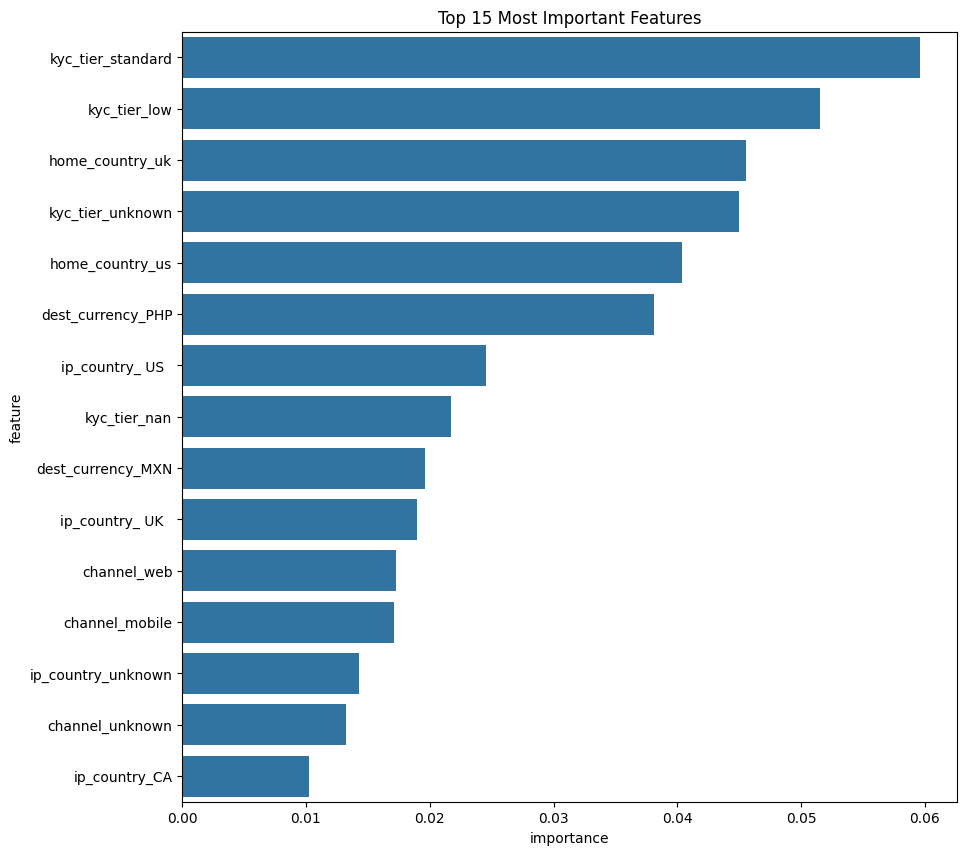

In [ ]:
# Plot top 15 feature importance

plt.figure(figsize=(10,10))
sns.barplot(x='importance', y='feature', data=feature_importance_df.head(15))
plt.title('Top 15 Most Important Features')

In [ ]:
# Create a transcation explainer function

def explain_transaction(idx, model, shap_values, x_test, y_test, features_names):
#Helps generate explanation for each trasaction

  true_label = "Fraud" if y_test.iloc[idx] == 1 else "legitimate"
  pred_proba = model.predict_proba(x_test[idx:idx+1])[0,1]
  prediction = "Fraud" if pred_proba > 0.5 else "legitimate"

  # get shap Values for this sample
  shap_vals = shap_values [idx]
  feature_vals = x_test[idx]

  # get top contributing features
  contributions = list(zip(features_names, feature_vals, shap_vals))
  contributions.sort(key=lambda x: abs(x[1]), reverse=True)

  # separate positive and negative contributors

  risk_factors = [c for c in contributions if c[2] > 0][:5]
  protective_factors = [c for c in contributions if c[2] < 0][:5]

  explanation = f"""

  Transaction Explanation

  ======================================================
  Transcation ID : Test Sample # {idx}
  True Label: {true_label}
  Predicted Label: {prediction}
  Predicted Probability Confidence : {pred_proba:.1%}

  Top Risk Factors (Increase Fraud Risk:)"""

  for feat , val,  shap_val in risk_factors:
            explanation +=f"  . {feat} : {val:.3f} ({shap_val:.3f}) \n"

            explanation += ("f\nTop protective factors (Decrease Fraud Risk):\n")
  for feat, val, shap_val in protective_factors:
                explanation += (f"  . {feat} : {val:.3f} ({shap_val:.3f})\n")

  return explanation
print('Function Defined')



Function Defined


In [ ]:
def explain_transaction(idx, model, shap_values, x_test, y_test, features_names):

    true_label = "Fraud" if y_test.iloc[idx] == 1 else "Legitimate"

    pred_proba = model.predict_proba(x_test[idx:idx+1])[0,1]
    prediction = "Fraud" if pred_proba > 0.5 else "Legitimate"

    shap_vals = shap_values[idx]
    feature_vals = x_test[idx]

    contributions = list(zip(features_names, feature_vals, shap_vals))
    contributions.sort(key=lambda x: abs(x[2]), reverse=True)

    risk_factors = [c for c in contributions if c[2] > 0][:5]
    protective_factors = [c for c in contributions if c[2] < 0][:5]

    explanation = f"""
Transaction Explanation
======================================================
Transaction ID: Test Sample #{idx}
True Label: {true_label}
Predicted Label: {prediction}
Predicted Probability Confidence: {pred_proba:.1%}

Top Risk Factors (Increase Fraud Risk):
"""

    # Print risk factors
    for feat, val, shap_val in risk_factors:
        explanation += f"  • {feat}: {val:.3f} (SHAP: {shap_val:.3f})\n"

    # Add protective header ONCE (outside loop)
    explanation += "\nTop Protective Factors (Decrease Fraud Risk):\n"

    # Print protective factors
    for feat, val, shap_val in protective_factors:
        explanation += f"  • {feat}: {val:.3f} (SHAP: {shap_val:.3f})\n"

    return explanation

In [ ]:
import random
import numpy as np

# Number of rows available in SHAP values
shap_sample_size = shap_values_fraud.shape[0]

# Fraud indices only within SHAP range
fraud_indices_shap = np.where(y_test[:shap_sample_size] == 1)[0]

# Pick a random fraud index from SHAP-computed rows
random_fraud_idx = random.choice(fraud_indices_shap)

print(f"Random fraud test sample (within SHAP range): {random_fraud_idx}")

# Show original data row
original_row_idx = test_df.index[random_fraud_idx]
print("\nOriginal transaction data:")
print(test_df.loc[original_row_idx])

print(explain_transaction(
    random_fraud_idx,
    rf_model,
    shap_values_fraud,
    x_test_processed[:shap_sample_size],
    y_test[:shap_sample_size],
    shap_features
))

Random fraud test sample (within SHAP range): 12

Original transaction data:
transaction_id               519a5d17-ddbc-468d-a74b-f5d24453ef68
customer_id                  bd01630c-6dde-4957-b67b-dda0938e5359
timestamp                        2025-03-25 08:13:31.573611+00:00
home_country                                                   us
source_currency                                               USD
dest_currency                                                 PHP
channel                                                    mobile
amount_src                                                1801.12
amount_usd                                                1801.12
fee                                                         27.96
exchange_rate_src_to_dest                               58.823529
device_id                    54c05b45-4e37-4d83-97e4-400a7c4f7308
new_device                                                   True
ip_address                                        250.250.110.180